In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("C:\stuff\FNB_DATA_QUEST\data_quest.csv")


In [5]:
data['item_type'].replace('NAN', np.nan)
data['interaction'].replace('NAN', np.nan)
data['count'] = data['item_type'].notna().astype(int)


In [7]:
data_grpd = data.groupby(['idcol','item_type', 'interaction']).sum()['count'].reset_index()


In [9]:
print('The grouped dataset has', data_grpd['idcol'].nunique(), 'unique users\n')

# Number of movies
print('The grouped dataset has', data_grpd['item_type'].nunique(), 'unique item products\n')

# Number of ratings
print('The grouped dataset has', data_grpd['count'].nunique(), 'unique counts\n')

# List of unique ratings
print('The unique counts are', sorted(data_grpd['count'].unique()))

The grouped dataset has 84375 unique users

The grouped dataset has 7 unique item products

The grouped dataset has 56 unique counts

The unique counts are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 48, 52, 53, 63, 67, 69, 77, 78, 81, 82, 84, 86, 103]


In [11]:
#calculating the averge usage for each user
agg_ratings = data_grpd.groupby('idcol').agg(mean_rating = ('count', 'mean'),
                                                number_of_ratings = ('count', 'count')).reset_index()

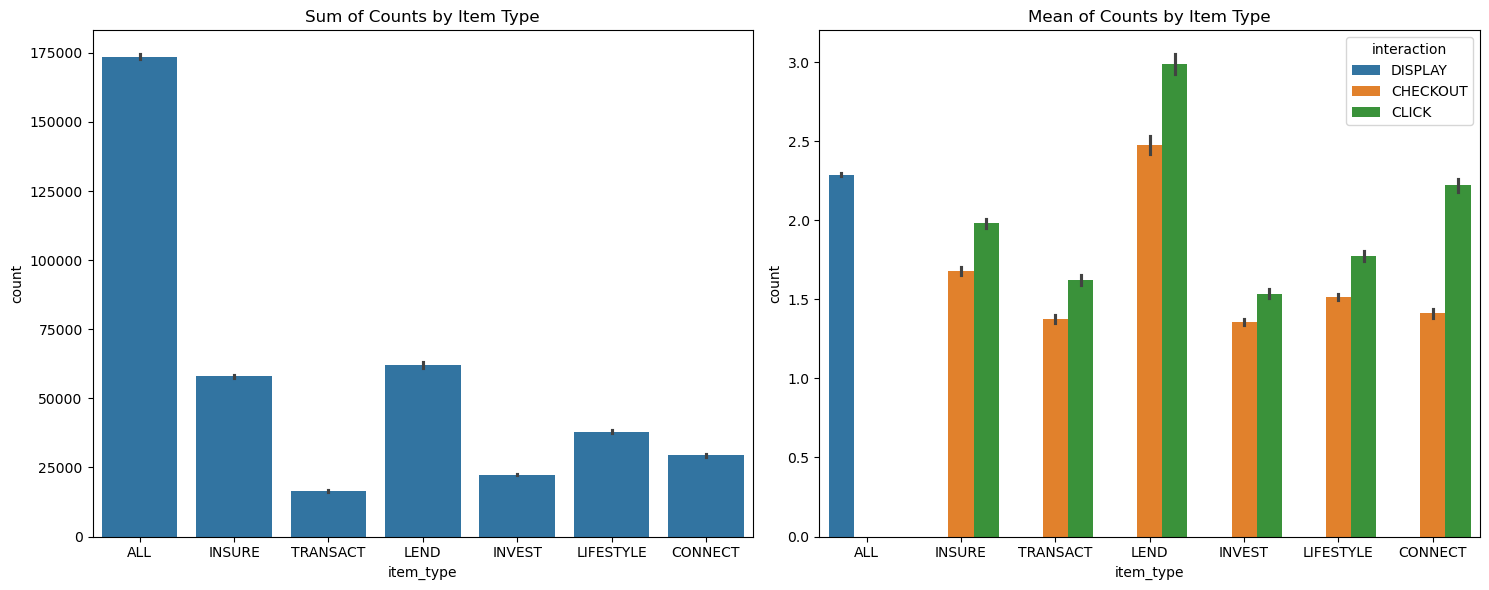

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot with sum as estimator
sns.barplot(x="item_type", y="count", data=data_grpd, estimator=np.sum, ax=axs[0])
axs[0].set_title('Sum of Counts by Item Type')

# Plot with mean as estimator
sns.barplot(x="item_type", y="count", data=data_grpd, estimator=np.mean, ax=axs[1], hue= "interaction")
axs[1].set_title('Mean of Counts by Item Type')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Item type all has high count because we can assume that there are more custormers who will view all the products than those who will click or checkout.

**Item type lend has the highest average count, meaning there are more custormers clicking on and checking out the lend item.

**When we group the average count for item type by interaction method, we see that for every item type customers only click the product more than they check it out. meaning customers are actually not reaching the final interaction stage in great numbers

In [15]:
#i can reduce the dataset by filtering out the users who have only displayed the products
display_users = data_grpd[data_grpd["interaction"]=='DISPLAY']

#create a dataset of user who have used the display item only once
filt_users = display_users[display_users['count']<4]

# Remove rows in data_grpd that are present in filt_users
data_filtered = data_grpd[~data_grpd.isin(filt_users).all(axis=1)]


In [17]:
print('The filtered dataset has', data_filtered['idcol'].nunique(), 'unique users\n')

# Number of movies
print('The filtered dataset has', data_filtered['item_type'].nunique(), 'unique item products\n')

# Number of ratings
print('The filtered dataset has', data_filtered['count'].nunique(), 'unique counts\n')

# List of unique ratings
print('The unique counts are', sorted(data_filtered['count'].unique()))

The filtered dataset has 48378 unique users

The filtered dataset has 7 unique item products

The filtered dataset has 56 unique counts

The unique counts are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 48, 52, 53, 63, 67, 69, 77, 78, 81, 82, 84, 86, 103]


In [19]:
print(f"the mean of the average number of usage per item type is: {data_filtered['count'].mean()}")

the mean of the average number of usage per item type is: 2.1996554407864415


In [21]:
#Merging the agg_ratings dataset and the filtered dataset will help with filtering users who have less than average usage for the items
df_ratings = data_filtered.merge(agg_ratings,on='idcol',how='left')


In [23]:
low_ratings = df_ratings[df_ratings['mean_rating']<2.23]
df_filter = df_ratings[~df_ratings.isin(low_ratings).all(axis=1)]


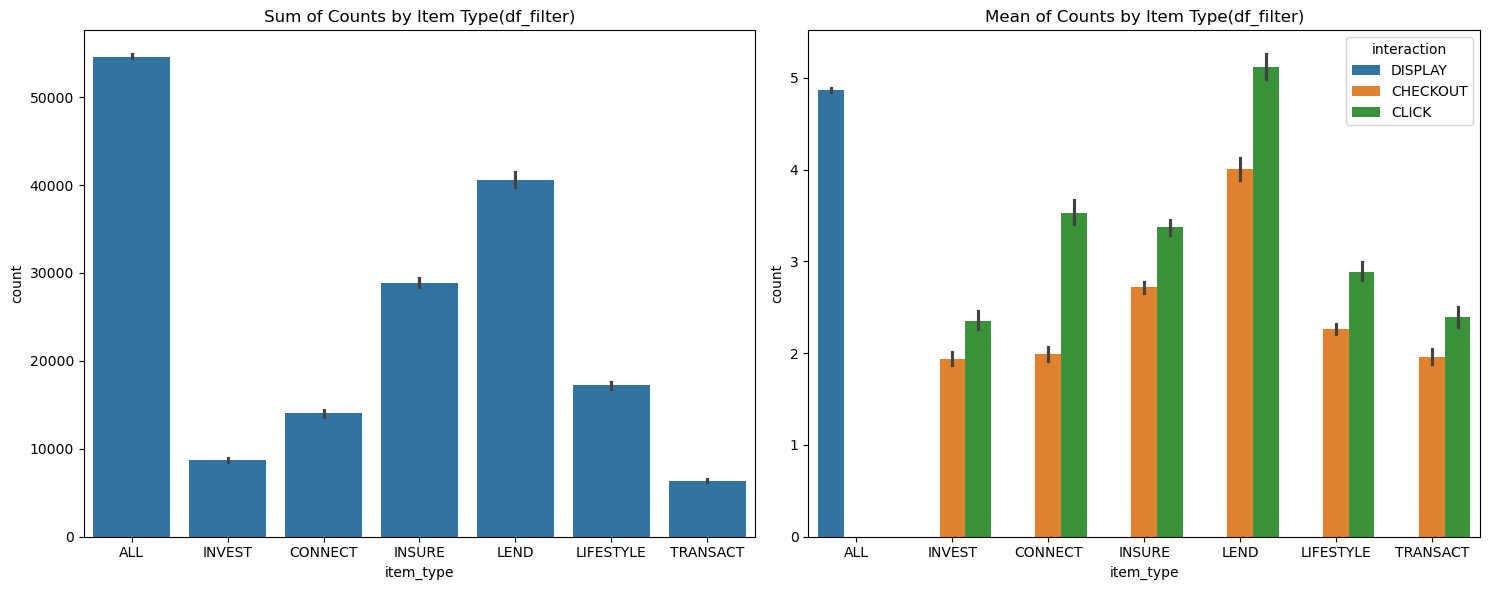

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot with sum as estimator
sns.barplot(x="item_type", y="count", data=df_filter, estimator=np.sum, ax=axs[0])
axs[0].set_title('Sum of Counts by Item Type(df_filter)')

# Plot with mean as estimator
sns.barplot(x="item_type", y="count", data=df_filter, estimator=np.mean, ax=axs[1], hue= "interaction")
axs[1].set_title('Mean of Counts by Item Type(df_filter)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**The filtering leaves us with less users than before, this however will help with reducing the cost of the activity

**The filtered data has a higher mean counts my items as a result of filtering out the users with less than average usage for the items


In [27]:
#dropping the mean ratings columns
df_final = df_filter.drop(['number_of_ratings', 'mean_rating'],axis = 1)


<Axes: xlabel='count', ylabel='item_type'>

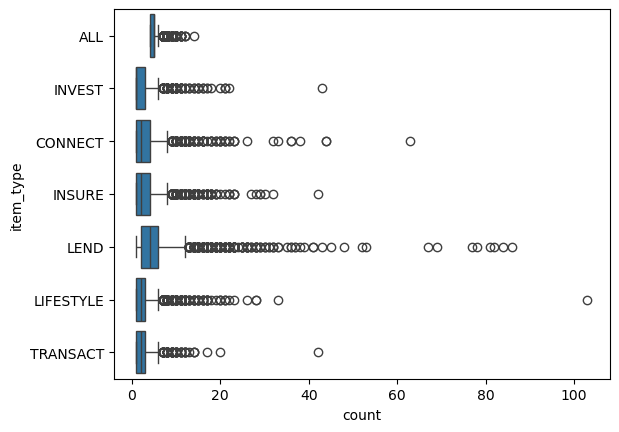

In [29]:
sns.boxplot(data=df_final, x=df_final['count'], y='item_type')

In [31]:
big_value = df_final[df_final['count']>26]
df_final2 = df_final[~df_final.isin(big_value).all(axis=1)]

<Axes: xlabel='count', ylabel='item_type'>

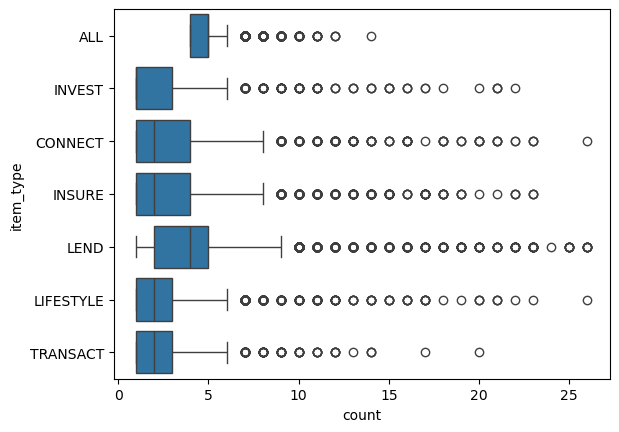

In [33]:
sns.boxplot(data=df_final2, x=df_final['count'], y='item_type')

In [35]:
df_final2['idcol'].nunique()

17001

In [37]:
#splitiing the data before pivoting the data
train_data, test_data = train_test_split(df_final2, test_size = 0.3, random_state = 42)

In [ ]:
train_data

In [39]:
#pivoting the data as a 2d 
#pivotting both the train dataset and test dataset
train_pivoted = pd.pivot_table(data=train_data, index='idcol', columns = 'item_type',values = 'count', aggfunc='sum')
test_pivoted = pd.pivot_table(data=test_data, index='idcol', columns = 'item_type',values = 'count', aggfunc='sum')

print(f"length of train dataset after pivoting is: {len(train_pivoted)}")
print(f"lenght of test dataset after pivoting is: {len(test_pivoted)}")

length of train dataset after pivoting is: 14770
lenght of test dataset after pivoting is: 9325


In [ ]:
train_pivoted

In [41]:
#the data may need to be normalised by subracting the mean of each row from each entry in that row, both train and test data should be normalized
#before that i will create a user similarity matrix using pearson's correlation. 

train_norm = train_pivoted.subtract(train_pivoted.mean(axis=1), axis = 'rows')
test_norm = test_pivoted.subtract(test_pivoted.mean(axis=1), axis = 'rows')

In [99]:
train_norm

item_type,ALL,CONNECT,INSURE,INVEST,LEND,LIFESTYLE,TRANSACT
idcol,,,,,,,
23484,NaN,NaN,NaN,0.0,NaN,NaN,NaN
28951,NaN,-0.25,-2.25,NaN,4.75,-2.25,NaN
31023,0.0,NaN,NaN,NaN,NaN,NaN,NaN
55558,NaN,NaN,NaN,NaN,NaN,0.00,NaN
57490,NaN,NaN,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
25631060818,NaN,2.00,NaN,NaN,-2.00,NaN,NaN
25631656518,2.0,-2.00,NaN,NaN,NaN,NaN,NaN
25638816118,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#creating a user-user similaity matrix using pearsons correlation
user_similarity = train_norm.T.corr()
user_similarity.head()

idcol,23484,28951,31023,55558,57490,62208,73205,78336,78840,107638,...,25618700218,25621419718,25627232518,25627337518,25628797718,25631060818,25631656518,25638816118,25642071818,25728632418
idcol,,,,,,,,,,,,,,,,,,,,,
23484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28951,NaN,1.0,NaN,NaN,NaN,1.0,NaN,0.998625,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,-1.0
31023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Excluding user 28951 so i can find users similar to him/her
# Pick a user ID
picked_userid = 28951

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

idcol,23484,28951,31023,55558,57490,62208,73205,78336,78840,107638,...,25618700218,25621419718,25627232518,25627337518,25628797718,25631060818,25631656518,25638816118,25642071818,25728632418
idcol,,,,,,,,,,,,,,,,,,,,,
23484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62208,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [47]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.5

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 28951 are idcol
23716590918    1.0
62208          1.0
201854939      1.0
207308562      1.0
205324657      1.0
204515303      1.0
204404731      1.0
203453977      1.0
203136765      1.0
202814191      1.0
Name: 28951, dtype: float64


In [49]:
# Items that the target user has used
picked_userid_items = train_norm[train_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_items

item_type,CONNECT,INSURE,LEND,LIFESTYLE
idcol,,,,
28951,-0.25,-2.25,4.75,-2.25


In [51]:
# Items that similar users used
similar_user_items = train_norm[train_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_items

item_type,ALL,CONNECT,INSURE,INVEST,LEND,LIFESTYLE
idcol,,,,,,
62208,0.333333,NaN,-2.666667,NaN,2.333333,NaN
201854939,2.250000,1.250000,-1.750000,-1.750000,NaN,NaN
202814191,NaN,1.500000,NaN,NaN,NaN,-1.5
203136765,-1.000000,-1.000000,NaN,NaN,2.000000,NaN
203453977,NaN,NaN,-4.000000,NaN,4.000000,NaN
204404731,NaN,-2.000000,NaN,NaN,2.000000,NaN
204515303,NaN,NaN,-3.500000,NaN,3.500000,NaN
205324657,NaN,NaN,-2.500000,NaN,2.500000,NaN
207308562,NaN,NaN,-0.500000,NaN,0.500000,NaN


In [53]:
#drop items that picked user has used from the similar user items list
similar_user_items.drop(picked_userid_items.columns,axis=1, inplace=True, errors='ignore')

similar_user_items

item_type,ALL,INVEST
idcol,,
62208,0.333333,NaN
201854939,2.250000,-1.750000
202814191,NaN,NaN
203136765,-1.000000,NaN
203453977,NaN,NaN
204404731,NaN,NaN
204515303,NaN,NaN
205324657,NaN,NaN
207308562,NaN,NaN


In [55]:
# Recomendations
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_items.columns:
  # Get the ratings for movie i
  item_rating = similar_user_items[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the item has rating
    if pd.isna(item_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the item rating
      score = similar_users[u] * item_rating[u]
      # Add the score to the total score for the item so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['Item', 'item_score'])

# Sort the items by score
ranked_item_score = item_score.sort_values(by='item_score', ascending=False)

# Select top m items
m = 3
ranked_item_score.head(m)



,Item,item_score
0,ALL,0.527778
1,INVEST,-3.041667


AS BY THE ABOVE METHOD

we would recommend item type ALL to our chosen user 28951

In [57]:
import sys
import surprise

from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from recommenders.datasets.python_splitters import python_random_split
from recommenders.evaluation.python_evaluation import (
    rmse,
    mae,
    rsquared,
    exp_var,
    map_at_k,
    ndcg_at_k,
    precision_at_k,
    recall_at_k,
    get_top_k_items,
)

from recommenders.models.surprise.surprise_utils import (
    predict,
    compute_ranking_predictions,
)
from recommenders.utils.notebook_utils import store_metadata


print(f"System version: {sys.version}")
print(f"Surprise version: {surprise.__version__}")

System version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Surprise version: 1.1.4


In [59]:
min_count = train_data['count'].min()
max_count = train_data['count'].max()
reader = surprise.Reader(rating_scale = (min_count, max_count))

train_set = surprise.Dataset.load_from_df(
    train_data[['idcol','item_type','count']], reader).build_full_trainset()
train_set

In [61]:
#using the SVD algorithm for matrix factorization
svd = surprise.SVD(random_state=0, n_factors=800, n_epochs=30)

with Timer() as train_time:
    svd.fit(train_set)

print(f"Took {train_time.interval} seconds for training.")

Took 5.280131500039715 seconds for training.


In [63]:
#predicting
predictions = predict(svd, test_data, usercol="idcol", itemcol="item_type")
#predictions.head()

In [65]:
with Timer() as test_time:
    all_predictions = compute_ranking_predictions(
        svd, train_data, usercol="idcol", itemcol="item_type", remove_seen=True
    )

print(f"Took {test_time.interval} seconds for prediction.")

Took 3.1680312999524176 seconds for prediction.


In [67]:
all_predictions[all_predictions['idcol']==28951]

,idcol,item_type,prediction
36988,28951,TRANSACT,2.025420
36989,28951,INVEST,2.335297
36990,28951,ALL,4.468862


In [71]:
test = test_data[['idcol','item_type','count']]

model evaluation

In [73]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

eval_rmse = rmse(test, predictions,col_user='idcol',col_item='item_type',col_rating='count',col_prediction='prediction')
eval_mae = mae(test, predictions,col_user='idcol',col_item='item_type',col_rating='count',col_prediction='prediction')
eval_rsquared = rsquared(test, predictions,col_user='idcol',col_item='item_type',col_rating='count',col_prediction='prediction')
eval_exp_var = exp_var(test, predictions,col_user='idcol',col_item='item_type',col_rating='count',col_prediction='prediction')

TOP_K = 2

eval_map = map_at_k(test, all_predictions,col_user='idcol',col_item='item_type',col_rating='count', col_prediction="prediction", k=TOP_K)
eval_ndcg = ndcg_at_k(test, all_predictions,col_user='idcol',col_item='item_type',col_rating='count', col_prediction="prediction", k=TOP_K)
eval_precision = precision_at_k(
    test, all_predictions,col_user='idcol',col_item='item_type',col_rating='count', col_prediction="prediction", k=TOP_K
)
eval_recall = recall_at_k(test, all_predictions,col_user='idcol',col_item='item_type',col_rating='count', col_prediction="prediction", k=TOP_K)

print(
    "RMSE:\t\t%f" % eval_rmse,
    "MAE:\t\t%f" % eval_mae,
    "rsquared:\t%f" % eval_rsquared,
    "exp var:\t%f" % eval_exp_var,
    sep="\n",
)

print("----")

print(
    "MAP:\t\t%f" % eval_map,
    "NDCG:\t\t%f" % eval_ndcg,
    "Precision@K:\t%f" % eval_precision,
    "Recall@K:\t%f" % eval_recall,
    sep="\n",
)

RMSE:		2.167431
MAE:		1.386672
rsquared:	0.308162
exp var:	0.309735
----
MAP:		0.259249
NDCG:		0.257518
Precision@K:	0.214064
Recall@K:	0.245570


RMSE squares the errors before averaging, making it more sensitive to larger errors. An RMSE of 2.166227 means that, on average, the predictions deviate from the actual ratings by about 2.17 units. Lower RMSE values indicate better predictive accuracy.

MAE measures the average absolute errors between the predicted and actual ratings. It is less sensitive to outliers compared to RMSE. An MAE of 1.384302 indicates that the average absolute error in the predictions is about 1.38 units. Like RMSE, lower MAE values are better.

R-Squared is a statistical measure that represents the proportion of the variance in the dependent variable (actual ratings) that is predictable from the independent variable (predicted ratings). An R² of 0.308931 means that approximately 31% of the variance in the actual ratings can be explained by the predictions

Explained variance measures how much of the variance in the data is accounted for by the model. An explained variance of 0.310649 suggests that around 31% of the variability in the actual ratings is captured by the model's predictions. Like R-Squared, higher values are better.



Both approaches suggest that for the chosen user 28951, we should recommend item type ALL and both method predict the same top two items to recommend for the user